## *Spectrum AWG Setup Wizard*

In [2]:
# Author: Marcus Culemann
# Version: March 2024

import numpy as np
from spectrum_card_interface import SpectrumCardInterface
from spectrum_card_waveform_generation_tool import SpectrumCardWaveformTool
import time
import matplotlib.pyplot as plt

######################################################################################################
## This file automatically sets up the Spectrum Card according to the chosen settings.              ##
######################################################################################################

#####################
# Waveform settings #
#####################

freq_array_horizontal= np.array([100e6]) 
freq_array_vertical = np.array([100e6])


amplitude_array_horizontal = np.ones_like(freq_array_horizontal)/2
# amplitude_array_horizontal = np.array([1, 0.8])
amplitude_array_vertical = np.ones_like(freq_array_vertical)

rng = np.random.default_rng(seed=13438354524)
phase_array_horizontal = rng.uniform(size=freq_array_horizontal.size)*2*np.pi*0
phase_array_vertical = rng.uniform(size=freq_array_vertical.size)*2*np.pi*0

#################
# Card Settings #
#################
spectrum_card = SpectrumCardInterface()
spectrum_card.ch1_enabled = False
spectrum_card.ch2_enabled = False

Vpp_ch1: int = 4000  # mV from 160 to 4000
Vpp_ch2: int = 160  # mV  


W1=(Vpp_ch1/1e3)**2/8/50
W2=(Vpp_ch2/1e3)**2/8/50
print("output channel 1: ", W1, "W", 10*np.log10(W1*1e3), "dBm")
print("output channel 2: ", W2, "W", 10*np.log10(W2*1e3), "dBm")

spectrum_card.amplitude_ch1 = int(Vpp_ch1/2)
spectrum_card.amplitude_ch2 = int(Vpp_ch2/2)
spectrum_card.num_loops = 100000000

mem_size=20
spectrum_card.memory_size = 1024**2 * mem_size
spectrum_card.sampleRate =  1250
# spectrum_card.trigger_or_tuple=('ext0',)
# spectrum_card.trigger_and_tuple= ('ext0',)

########################################
# Generate the waveform and setup card #
########################################

waveform_generator = SpectrumCardWaveformTool(freq_array_horizontal=freq_array_horizontal,
                                     freq_array_vertical=freq_array_vertical,
                                     amplitude_array_horizontal=amplitude_array_horizontal,
                                     amplitude_array_vertical=amplitude_array_vertical,
                                     phase_array_horizontal=phase_array_horizontal,
                                     phase_array_vertical=phase_array_vertical,
                                     num_samples=spectrum_card.memory_size,
                                     sample_rate=spectrum_card.sampleRate
                                     )

spectrum_card.replay_data_ch1 = waveform_generator.getWaveformHorizontal()
spectrum_card.replay_data_ch2 = waveform_generator.getWaveformVertical()

y = spectrum_card.replay_data_ch1
z = spectrum_card.replay_data_ch2

spectrum_card.setupCard()
spectrum_card.startReplay()
spectrum_card.closeCard()


output channel 1:  0.04 W 16.02059991327962 dBm
output channel 2:  6.4e-05 W -11.938200260161128 dBm
Could not enable selected channels. Is any channel enabled?


SystemExit: 1

c:\Users\florydberg01\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# *FourierTransform Check*

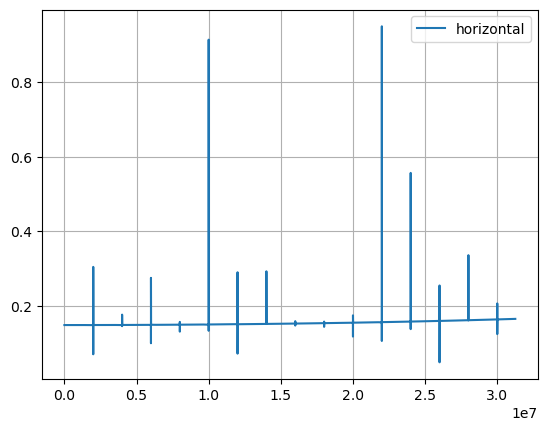

2.20E+07


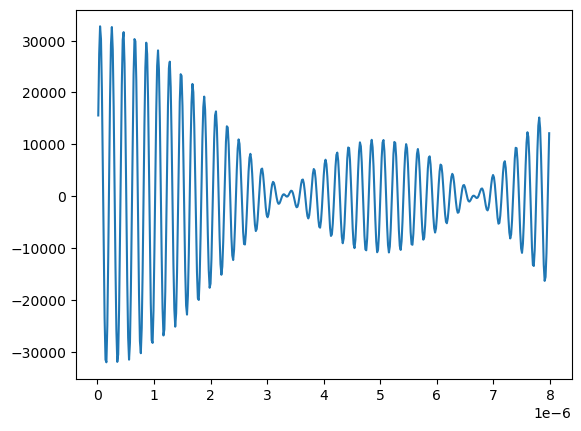

In [ ]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 1048576

# sample spacing

T = mem_size / spectrum_card.sampleRate*1e-6

t = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(y)
zf=fft(z)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt

yfp=2.0/N * np.abs(yf[0:N//2])
zfp=2.0/N * np.abs(zf[0:N//2])
plt.figure()
plt.plot(xf, yfp)
# plt.plot(xf, zfp)

plt.legend(["horizontal", "vertical"])
plt.grid()

plt.show()

print("{:.2E}".format(xf[np.argmax(yfp)]))


plt.figure()
plt.plot(t[1:500], y[1:500])